<center><H1>Auto Data Set</H1></center><br><br>
<center><img src="https://img.freepik.com/premium-vector/set-futuristic-car-service-scanning-auto-data-analysis-intelligent-car-banner_74231-1065.jpg?w=1800" width="400px" height="400px"></center>


 <center> <H3> In association with An Introduction to Statistical Learning: With Applications in R (ISLR V 2)  </H3></center>
  <center> <H4 style="color:blue;">  Answer for Applied <b>Question 08 of Chapter 03</b> </H4></center>


<H3> About the Data Set </H3><br>

**Description**
Gas mileage, horsepower, and other information for 392 vehicles.

**Usage**
Auto

**Format**
A data frame with **392 observations** on the following 9 variables.

1. mpg: miles per gallon
2. cylinders: Number of cylinders between 4 and 8
3. displacement: Engine displacement (cu. inches)
4. horsepower: Engine horsepower
5. weight: Vehicle weight (lbs.)
6. acceleration: Time to accelerate from 0 to 60 mph (sec.)
7. year: Model year (modulo 100)
8. origin: Origin of car (1. American, 2. European, 3. Japanese)
9. name: Vehicle name

**Source**
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

**References**
James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, https://www.statlearning.com, Springer-Verlag, New York


In [1]:
# load data set
Auto = read.csv("/kaggle/input/autompg-dataset/auto-mpg.csv", header=TRUE, na.strings='?',stringsAsFactors = T)
dim(Auto)

[1] 398   9

In [2]:
# omit nulls
Auto <- na.omit(Auto)
dim(Auto)

[1] 392   9

In [3]:
# check for data types
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model.year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car.name    : Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...
 - attr(*, "na.action")= 'omit' Named int [1:6] 33 127 331 337 355 375
  ..- attr(*, "names")= chr [1:6] "33" "127" "331" "337" ...


**(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor.**

In [5]:
# fit regression line
attach(Auto)
model1 <- lm(mpg ~ horsepower)


**Use the summary() function to print the results. Comment on the output.**
1. Is there a relationship between the predictor and the re- sponse?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [6]:
# view the summary 
summary(model1)


Call:
lm(formula = mpg ~ horsepower)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [7]:
# produce confidence intervals
predict(model1, data.frame(horsepower = (c(98))), interval = "confidence")
# produce prediction intervals
predict(model1, data.frame(horsepower = (c(98))),interval = "prediction")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


,fit,lwr,upr
1,24.46708,14.8094,34.12476


1. **Yes** there a relationship between horsepower and mpg
2. **Very strong** relationship exist between horsepower and mpg. Based on the R^2 which is 0.6059 we can get the **Correlation coefficient which is 0.7783**
3. **Negative relationship** between horsepower and mpg. Based on the minus sign infront of the Coefficient.
4. 24.46708

**(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.**

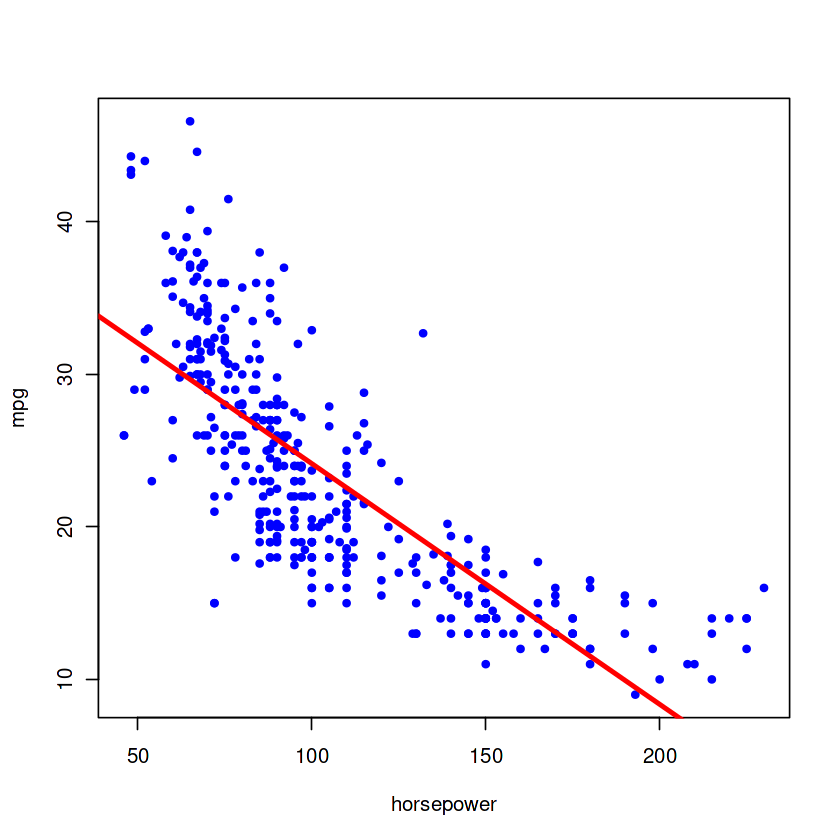

In [8]:
# plot mpg and horsepower
plot(horsepower, mpg,col = "blue", pch =20)
# fit regression line
abline(model1, lwd = 3,col = "red")

**(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**

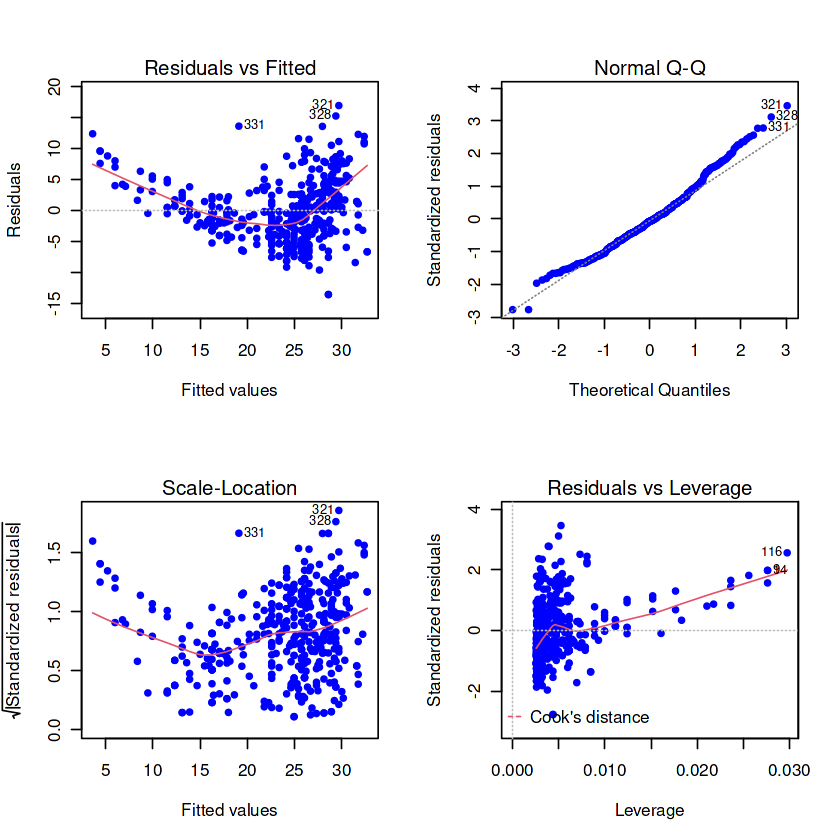

In [11]:
# diagnostic tests

# to split the screen
par(mfrow = c(2, 2))
# to plot diagnostic plots
plot(model1,col = "blue", pch =20 )

**Note:**

The residual plot shows the residuals (prediction errors) of the model plotted against the fitted values. If the plot shows a pattern, it may indicate that the model is not adequately capturing the underlying relationships in the data. **Since the residual plot shows a pattern Homoscedasticity assumption is violated.**

The leverage plot shows the influence of each observation on the fit of the model. Observations with high leverage can have a disproportionate influence on the fit of the model.

The normal Q-Q plot compares the quantiles of the residuals to the quantiles of a normal distribution. If the residuals are normally distributed, the points on the plot should lie approximately on a straight line.**Thus the data set is normally distributed.**

The scale-location plot shows the residuals plotted against the fitted values, with the square root of the leverage on the x-axis. This plot can help you identify any outliers in the data. **Thus the data set includes outliers.**

The Cook's distance plot shows the influence of each observation on the fit of the model, with observations with higher influence shown farther to the right. This plot can help you identify any observations with unusually high leverage.

If you see any problems with the fit of the model or any unusually large outliers or observations with high leverage, you may need to consider adjusting the model or removing these observations from the data. **Which means in further studies we need to adjust the model.**